In [1]:
import os
import pandas as pd
import numpy as np
import rasterio as rio
from itertools import product
from rasterio import windows
import scienceplots
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

from osgeo import gdal
from osgeo.gdalconst import GDT_Int16

In [2]:
def to_2d_array(x: np.ndarray)->np.ndarray: #misha grol function
    return x.reshape(x.shape[0], x.shape[1] * x.shape[2])

In [3]:
plt.style.use(['science', 'no-latex'])

sns.set_style("whitegrid", {'axes.grid' : False})
plt.rcParams.update({
    "font.family": "serif",  
    "font.serif": 'Palatino',  
    "font.size":9,
    "axes.labelsize":9,
    "xtick.labelsize" : 9,
    "ytick.labelsize" : 9})    

dict_normal_names_rus = {#0: 'Нет данных',
    1: 'Деревья',
    2: 'Заболоченные участки',
    3: 'Вода',
    4: 'Поселения, н-земли',
    5: 'Пустоши',
    6: 'С/Х и травы',
    7: 'Кустарники',
    8: 'Породы',
    9: 'Редкая растительность'}

dict_normal_names_eng = {#0: 'No data',
    1: 'Trees',
    2: 'Flooded area',
    3: 'Open water',
    4: 'Settlements and damaged lands',
    5: 'Barrens',
    6: 'Agriculture and grassland',
    7: 'Shrubs',
    8: 'Rocks',
    9: 'Sparse vegetation'}

colors =[
    '#117733', '#9e2a90', '#88ccee', '#ca7878', '#dbd73e', '#c7c7c9', '#60d52a','#418c84' #, '#92462d'
]


In [6]:
def get_pictures(fname, output_name='', data_return = False, plt_show = True, save_pics = False):
    with rio.open(fname, 'r+') as src:
        x = src.read()
        col_names = ['class']
        params = x[:len(x), ...]
        params = to_2d_array(x[:len(x), ...]) 
        raw_data = pd.DataFrame(params.T, columns=col_names)

    data = raw_data.groupby('class')['class'].agg({'count'}).reset_index()
    data = data[data['class']!=0]
    data['class'] = data['class'].apply(lambda x: 5 if x==8 else x) #helper!
    data['percent'] = data['count'].apply(lambda x: x/sum(data['count'])*100)
    data['names_rus'] = data['class'].apply(lambda x: dict_normal_names_rus[x])
    data['names_eng'] = data['class'].apply(lambda x: dict_normal_names_eng[x])

    data['area_ha'] = data['count']*0.01 #from pixel area equals to 10x10 m2

    plt.figure(figsize=(7,4))
    sns.barplot(data=data, x='names_eng', y='percent', palette=colors)
    plt.xlabel('')
    #plt.ylabel('Area, ha')
    plt.ylabel('Percent of area')
    #plt.title('Number of pixels per class')
    plt.xticks(rotation=45)
    if save_pics == True:
        plt.savefig(output_name+'.png', dpi = 300, bbox_inches="tight")
    
    if plt_show == True:
        plt.show()
    
    if data_return == True:
        return data

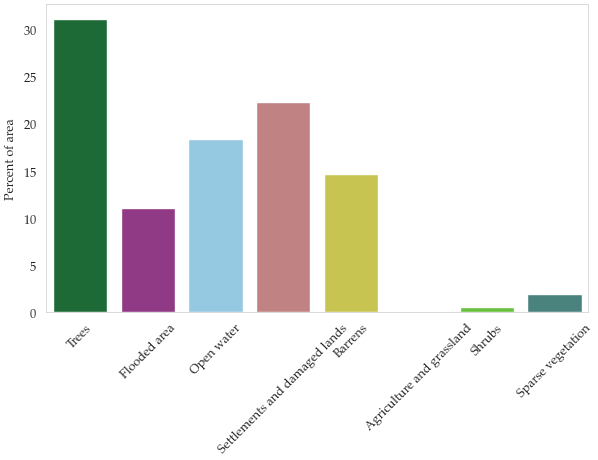

,class,count,percent,names_rus,names_eng,area_ha
1,1,96142,31.122981,Деревья,Trees,961.42
2,2,34264,11.091904,Заболоченные участки,Flooded area,342.64
3,3,56670,18.345149,Вода,Open water,566.70
4,4,68726,22.247904,"Поселения, н-земли",Settlements and damaged lands,687.26
5,5,45439,14.709462,Пустоши,Barrens,454.39
6,6,75,0.024279,С/Х и травы,Agriculture and grassland,0.75
7,7,1788,0.578809,Кустарники,Shrubs,17.88
8,9,5806,1.879512,Редкая растительность,Sparse vegetation,58.06


In [7]:
get_pictures(fname='data/RF_best_model_2021.tif',
            save_pics=False, data_return=True)